In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#SIFT
print(cv2.__version__)
img = cv2.imread('./img/sift1.png')
# create sift class
sift = cv2.xfeatures2d.SIFT_create()
# detect SIFT
kp = sift.detect(img,None)   # None for mask
# compute SIFT descriptor
kp,des = sift.compute(img,kp)
print(des.shape)
img_sift= cv2.drawKeypoints(img,kp,outImage=np.array([]), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow('lenna_sift.jpg', img_sift)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

3.3.0
(551L, 128L)


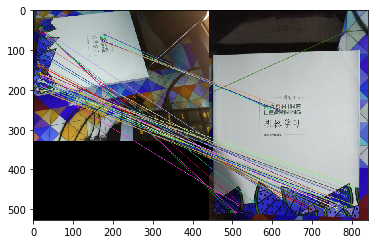

(<matplotlib.image.AxesImage at 0x8753ba8>, None)

In [3]:
#SIFT and Match
img1 = cv2.imread('./img/sift1.png')
img2 = cv2.imread('./img/sift2.png')
 
sift = cv2.xfeatures2d.SIFT_create()
 
kp1, des1 = sift.detectAndCompute(img1,None)#利用sift.detectAndCompute()函数找到特征点，计算描述符；
kp2, des2 = sift.detectAndCompute(img2,None)
 
bf = cv2.BFMatcher()#创建暴力匹配对象，cv2.BFMatcher()；
 
matches = bf.knnMatch(des1,des2, k=2)#使用Matcher.knnMatch()获得两幅图像的K个最佳匹配；
 
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance: #获得的K个最佳匹配中取出来第一个和第二个，进行比值，比值小于0.75，则为好的匹配点
        good.append([m])
 
img3 = np.empty((300,300))
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good[:50],img3,flags=2) #采用cv2.drawMatchesKnn()函数，在最佳匹配的点之间绘制直线
plt.imshow(img3),plt.show()